In [1]:
import numpy as np

2. 给定矩阵
$$
A = \begin{pmatrix}
2 & 1 \\
4 & 5
\end{pmatrix}
$$
(1)计算A的特征值和特征矩阵

In [3]:
A = np.array([[2, 1], [4, 5]])

eigenvalue, eigenvector = np.linalg.eig(A)
print(f"eigenvalue is {eigenvalue}\n")
print(f"eigenmatrix is\n {eigenvector}\n")

eigenvalue is [1. 6.]

eigenmatrix is
 [[-0.70710678 -0.24253563]
 [ 0.70710678 -0.9701425 ]]



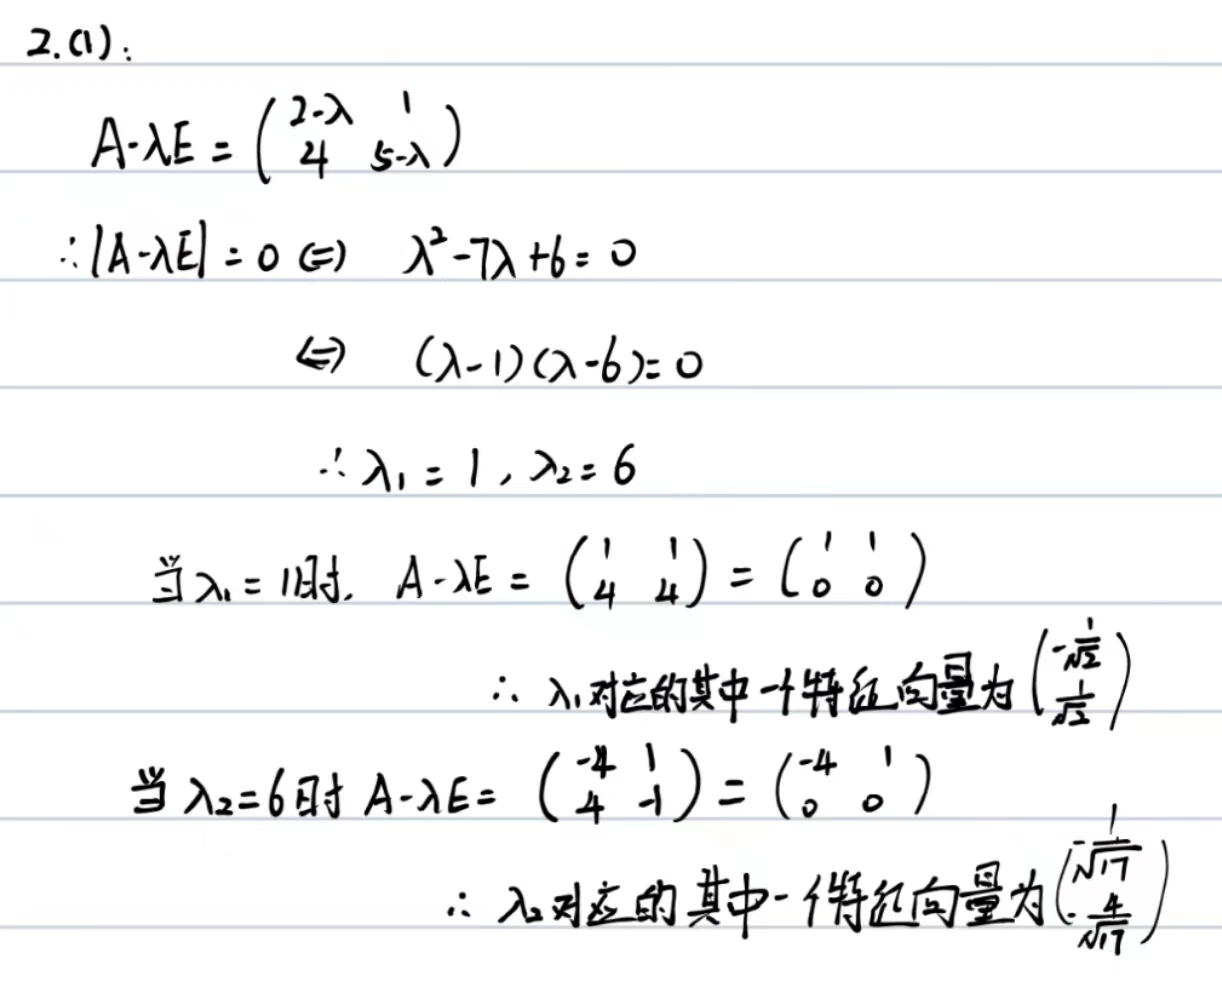

（2） 给定一个起始向量$v = (1, 1)^T$，利用幂法估计A的主特征值和对应的特征向量。

In [12]:
def power_method(initial, matrix, epsilon=1e-6, max_iterations=100):
    """
    Power Method for finding dominant eigenvalue and eigenvector of a square matrix.
    
    Args:
        matrix (numpy.ndarray): The input square matrix.
        epsilon (float): The desired tolerance for convergence (default: 1e-6).
        max_iterations (int): The maximum number of iterations (default: 100).
    
    Returns:
        float: The dominant eigenvalue.
        numpy.ndarray: The dominant eigenvector.
    """
    eigenvector = initial
    
    # Perform Power Method iterations
    for i in range(max_iterations):
        # Update the eigenvector
        new_eigenvector = matrix @ eigenvector
        
        # Normalize the eigenvector
        new_eigenvector /= np.linalg.norm(new_eigenvector)
        
        # Check for convergence
        if np.linalg.norm(new_eigenvector - eigenvector) < epsilon:
            break
        
        # Update the eigenvector for the next iteration
        eigenvector = new_eigenvector
    
    # Compute the dominant eigenvalue
    eigenvalue = new_eigenvector @ matrix @ new_eigenvector
    
    return eigenvalue, new_eigenvector

In [13]:
initial = np.array([1,1], dtype=np.float64)

eigenvalue, eigenvector =  power_method(initial, A)
print(eigenvalue)
print(eigenvector)
print(np.allclose(A @ eigenvector, eigenvalue * eigenvector, rtol=1e-4))

6.000000131332534
[0.24253567 0.97014249]
True


3. 设$\lambda_1,\lambda_2, \cdots, \lambda_n$是矩阵$A \in R^{n \times n}$的特征值，证明：

(1) 矩阵$A - \sigma I$的特征值为$\lambda_i - \sigma$。其中，$i = 1, 2, \cdots, n.$

(2) 逆矩阵$(A - \sigma I)^{-1}$的特征值为$(\lambda_i - \sigma)^{-1}$。其中，$i = 1, 2, \cdots, n.$

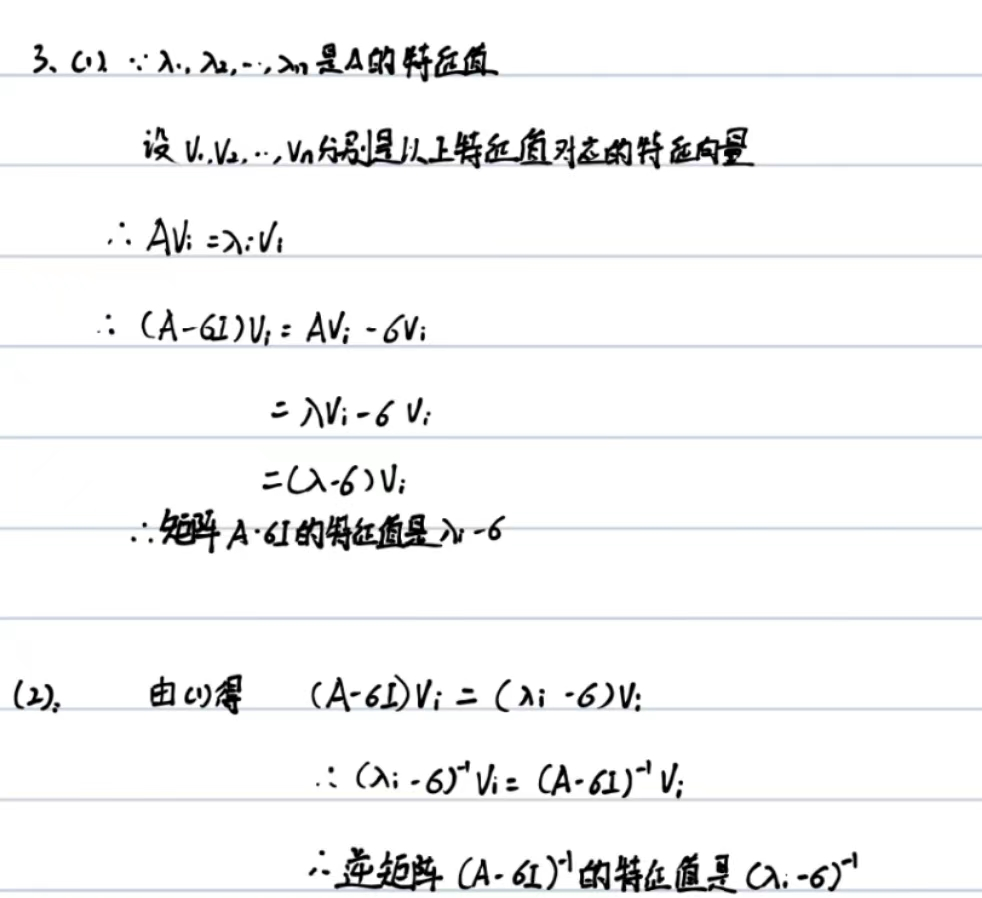

4. 给定矩阵
$$
A = \begin{pmatrix}
1 & 3 \\
3 & 4
\end{pmatrix}
$$

In [45]:
A = np.array([[1,3], [3,4]])

In [46]:
np.linalg.eig(A)

(array([-0.85410197,  5.85410197]),
 array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [53]:
def raylaign(initial, matrix, iteration=1000, tol=1e-5):
    
    """
    Args:
        initial: the initial eigenvalue
        matrix(ndarray): the input square matrix
    """
    
    n = matrix.shape[1]
    v = np.ones(n)
    u = v / np.linalg.norm(v)
    mu1 = initial

    for i in range(iteration):
        v = np.linalg.solve(matrix - mu1 * np.eye(n), u)
        u = v / np.linalg.norm(v)
        mu2 = u @ matrix @ u 
        if np.abs(mu1 - mu2) < tol:
            break
            
        # Update the eigenvector for the next iteration
        mu1 = mu2
        
    return mu2, u

(1) 使用瑞利商迭代法找到矩阵A的任一特征值。

In [54]:
for i in range(10):
    initial = i
    print(raylaign(initial,A))

(-0.8541019662496847, array([-0.85065081,  0.52573111]))
(5.854101966249683, array([0.52573111, 0.85065081]))
(5.854101966249685, array([0.52573111, 0.85065081]))
(5.854101966249684, array([0.52573111, 0.85065081]))
(5.854101966249683, array([0.52573111, 0.85065081]))
(5.854101966249684, array([0.52573111, 0.85065081]))
(5.854101966249684, array([-0.52573111, -0.85065081]))
(5.854101966249683, array([-0.52573111, -0.85065081]))
(5.854101966249685, array([-0.52573111, -0.85065081]))
(5.854101966249685, array([-0.52573111, -0.85065081]))


(2)已知矩阵A的第二大特征值$\lambda_2$接近于1，求对应的特征向量。

In [55]:
raylaign(1, A)

(5.854101966249683, array([0.52573111, 0.85065081]))

6. 求解矩阵A所有的特征值与特征向量
$$
A = \begin{pmatrix}
1 & 1 & 1 \\
1 & 2 & 3 \\
1 & 3 & 6 \\
\end{pmatrix}
$$


In [28]:
A = np.array([[1,1,1], [1,2,3], [1,3,6]])
eigenValue, eigenVector = np.linalg.eig(A)
for i in range(len(eigenValue)):
    print(f"{eigenValue[i]:.2f}'s responding eigenVector is {eigenVector[:,i]}")

7.87's responding eigenVector is [-0.19382266 -0.47224729 -0.8598926 ]
1.00's responding eigenVector is [-0.81649658 -0.40824829  0.40824829]
0.13's responding eigenVector is [ 0.54384383 -0.78122713  0.30646053]


In [29]:
# test
print(np.allclose(A @ eigenVector[:,1].T,eigenValue[1] * eigenVector[:, 1], rtol=1e-8))

True


7. 对于任意矩阵A,证明$A A^T$和$A^T A$是对称且半正定的。

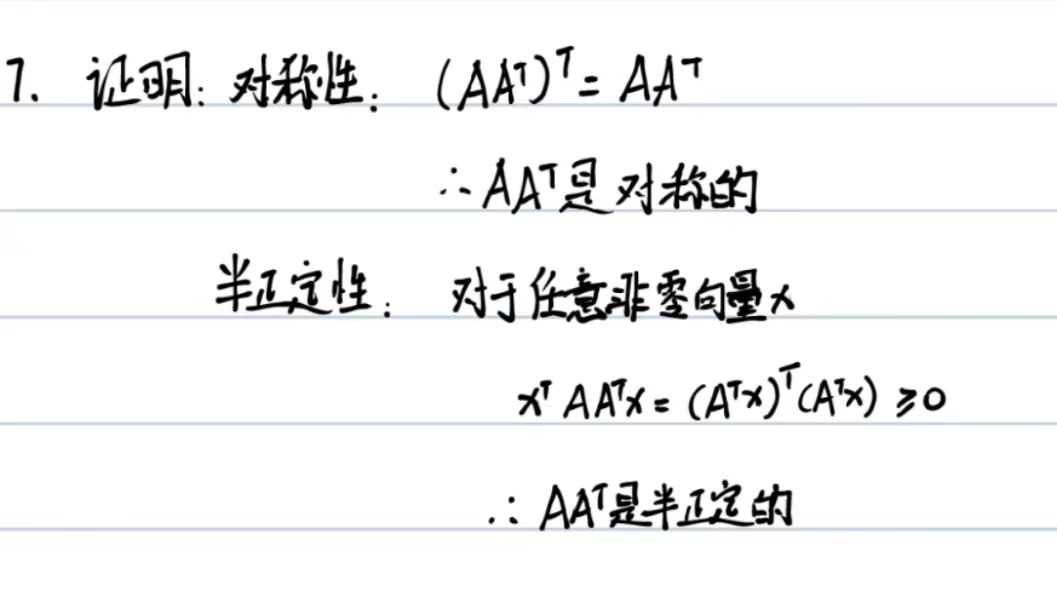

9. 用幂法计算矩阵
$$
A = \begin{pmatrix}
1 & 1 & 0.5 \\
1 & 1 & 0.25 \\
0.5 & 0.25 & 2
\end{pmatrix}
$$
的主特征值和对应的特征向量

In [14]:
A = np.array([[1,1,0.5], [1,1,0.25], [0.5, 0.25, 2]])
initial = np.array([1,1,1.0])

dominant_eigenvalue, dominant_eigenvector = power_method(initial, A)
print(f"dominant_eigenvalue: {dominant_eigenvalue:.2f}")
print(f"dominant_eigenvector: {dominant_eigenvector}")

dominant_eigenvalue: 2.54
dominant_eigenvector: [0.53148399 0.46147408 0.71032841]


10. 用反幂法求矩阵
$$
A = \begin{pmatrix}
2 & 1 & 0 \\
1 & 3 & 1 \\
0 & 1 & 4
\end{pmatrix}
$$
对应于特征值$\lambda_3 = 3 - \sqrt{3} \approx 1.2679$的特征向量。

In [24]:
def inverse_power_method(initial, matrix, eigenvalue_guess, epsilon=1e-6, max_iterations=100):
    """
    Inverse Power Method for finding eigenvalue closest to a specified value and its corresponding eigenvector 
    of a square matrix.
    
    Args:
        initial: the initial vector
        matrix (numpy.ndarray): The input square matrix.
        eigenvalue_guess (float): The initial guess for the eigenvalue.
        epsilon (float): The desired tolerance for convergence (default: 1e-6).
        max_iterations (int): The maximum number of iterations (default: 100).
    
    Returns:
        float: The eigenvalue closest to the specified value.
        numpy.ndarray: The eigenvector corresponding to the eigenvalue.
    """
        # Get the number of rows in the matrix
    n = matrix.shape[0]
    
    eigenvector = initial
    eigenvector /= np.linalg.norm(eigenvector)
    
    # Perform Inverse Power Method iterations
    for i in range(max_iterations):
        # Solve the linear system to obtain new eigenvector
        new_eigenvector = np.linalg.solve(matrix - eigenvalue_guess * np.eye(n), eigenvector)
        
        # Normalize the eigenvector
        new_eigenvector /= np.linalg.norm(new_eigenvector)
        
        # Check for convergence
        if np.linalg.norm(new_eigenvector - eigenvector) < epsilon:
            break
        
        # Update the eigenvector for the next iteration
        eigenvector = new_eigenvector
    
    # Compute the eigenvalue closest to the specified value
    # although we have substract eigenvalue_guess, but the related eigenvector doesn't change actually, so we can directly compute eigenvalue by this eigenvector
    eigenvalue = (new_eigenvector @ matrix @ new_eigenvector) / (new_eigenvector @ new_eigenvector)
    
    return eigenvalue, new_eigenvector

In [22]:
initial = np.array([1.0, 1.0, 1.0])
A = np.array([[2,1,0],[1,3,1], [0,1,4]])
eigen_guess = 1.2679
eigenvalue, eigenvector = inverse_power_method(initial, A, eigen_guess)
print(f"eigenvalue: {eigenvalue}")
print(f"eigenvector: {eigenvector}")

eigenvalue: 1.2679491924311226
eigenvector: [ 0.78867513 -0.57735027  0.21132487]
